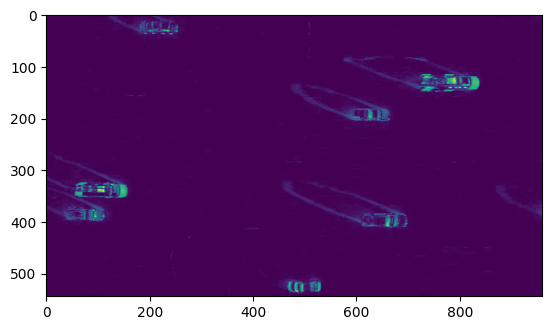

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_frame(current_frame, previous_frame):
    # Convert both frames to grayscale
    gray_current = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    gray_previous = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    frame_diff = cv2.absdiff(gray_current, gray_previous)
    plt.imshow(frame_diff)
    plt.show()
    # Apply a threshold to get a binary image
    _, thresh = cv2.threshold(frame_diff, 50, 255, cv2.THRESH_BINARY)

    # Additional processing to remove noise
    kernel = np.ones((5,5), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=2)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def detect_vehicles(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, previous_frame = cap.read()  # Read the first frame

    while True:
        ret, current_frame = cap.read()
        if not ret:
            break

        contours = process_frame(current_frame, previous_frame)
        return
        vehicles = []

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = w / float(h)
            area = cv2.contourArea(cnt)

            # Filter based on size and aspect ratio
            if area > 300 and aspect_ratio < 5:  # Adjust the aspect ratio threshold as needed
                vehicles.append(cnt)

        vehicle_count = len(vehicles)
        currentframecopy = current_frame.copy()
        # Draw contours and display the vehicle count
        cv2.drawContours(currentframecopy, vehicles, -1, (0, 255, 0), 2)
        text = f'Vehicles Detected: {vehicle_count}'
        cv2.putText(currentframecopy, text, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

        # Convert frame from BGR to RGB (matplotlib uses RGB)
        frame_rgb = cv2.cvtColor(currentframecopy, cv2.COLOR_BGR2RGB)

        # Display the image with matplotlib
        plt.imshow(frame_rgb)
        plt.title(text)
        plt.pause(0.1)  # Pause for a brief moment to display the frame
        plt.clf()  # Clear the current frame before showing the next one

        # Update the previous frame
        previous_frame = current_frame.copy()

        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

detect_vehicles('cars4.mp4')

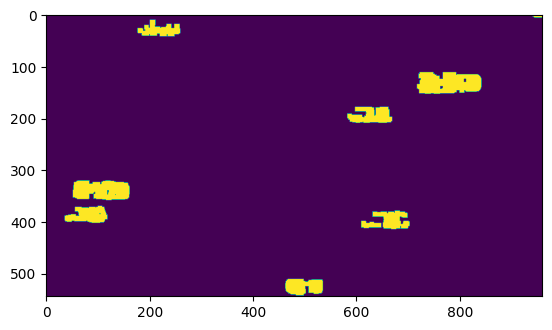

(array([[[468, 511]],

       [[467, 512]],

       [[466, 512]],

       [[466, 513]],

       [[464, 515]],

       [[464, 518]],

       [[463, 519]],

       [[463, 529]],

       [[464, 530]],

       [[464, 533]],

       [[465, 534]],

       [[465, 535]],

       [[466, 535]],

       [[467, 536]],

       [[468, 536]],

       [[469, 537]],

       [[469, 538]],

       [[471, 538]],

       [[472, 539]],

       [[473, 539]],

       [[474, 540]],

       [[482, 540]],

       [[484, 542]],

       [[498, 542]],

       [[498, 540]],

       [[499, 539]],

       [[500, 539]],

       [[501, 538]],

       [[502, 538]],

       [[502, 530]],

       [[501, 529]],

       [[501, 525]],

       [[502, 524]],

       [[507, 524]],

       [[508, 525]],

       [[508, 537]],

       [[517, 537]],

       [[518, 538]],

       [[518, 539]],

       [[527, 539]],

       [[528, 538]],

       [[532, 538]],

       [[534, 536]],

       [[534, 534]],

       [[535, 533]],

       [[

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
c1 = 0
f1 = 0
def process_frame(current_frame, previous_frame):
    # Convert both frames to grayscale
    gray_current = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    gray_previous = cv2.cvtColor(previous_frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    frame_diff = cv2.absdiff(gray_current, gray_previous)
    
    # Apply a threshold to get a binary image
    _, thresh = cv2.threshold(frame_diff, 50, 255, cv2.THRESH_BINARY)
    
    
    # Additional processing to remove noise
    kernel = np.ones((5,5), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=2)
    
    plt.imshow(thresh)
    plt.show()
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # return contours,frame_diff,thresh
    return contours
    
def compute_covariance_matrix(frame, x, y, w, h):
    """
    Compute the covariance matrix for the region specified by (x, y, w, h) in the frame.
    """
    region = frame[y:y+h, x:x+w]
    feature_set = np.float32(region.reshape(-1, 3))  # Reshape and convert to float
    mean, eigenvectors = cv2.PCACompute(feature_set, mean=None)
    covariance_matrix = np.cov(feature_set, rowvar=False)
    return covariance_matrix

def calculate_direction(prev_position, current_position):
    dx = current_position[0] - prev_position[0]
    dy = current_position[1] - prev_position[1]
    return np.arctan2(dy, dx)  # Returns angle in radians

def detect_vehicles(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, previous_frame = cap.read()
    prev_cov_matrices = []
    prev_positions = []
    cnts = []
    while True:
        ret, current_frame = cap.read()
        if not ret:
            break
        
        contours = process_frame(current_frame, previous_frame)
        c1 = contours
        print(c1)
        # Draw contours and display the vehicle count
        
        current_cov_matrices = []
        current_positions = []

        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = w / float(h)
            area = cv2.contourArea(cnt)

            if area > 300 and aspect_ratio < 5:
                cov_matrix = compute_covariance_matrix(current_frame, x, y, w, h)
                return
                centroid = (x + w//2, y + h//2)
                current_cov_matrices.append(cov_matrix)
                current_positions.append(centroid)
                cnts.append(cnt)

        
        current_frame2=current_frame.copy()
        for i, (cur_pos, cur_cov) in enumerate(zip(current_positions, current_cov_matrices)):
            min_dist = float('inf')
            matched_index = -1

            for j, (prev_pos, prev_cov) in enumerate(zip(prev_positions, prev_cov_matrices)):
                dist = np.linalg.norm(cur_cov - prev_cov)
                if dist < min_dist:
                    min_dist = dist
                    matched_index = j

            if matched_index != -1:
                direction = calculate_direction(prev_positions[matched_index], cur_pos)
                direction_degrees = np.degrees(direction)
                x, y, w, h = cv2.boundingRect(contours[i])
                cv2.rectangle(current_frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(current_frame2, f'Dir: {direction_degrees:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        prev_positions = current_positions.copy()
        prev_cov_matrices = current_cov_matrices.copy()
        previous_frame = current_frame.copy()
        frame_rgb = cv2.cvtColor(current_frame2, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f'Vehicles Detected: {len(current_positions)}')
        plt.pause(0.1)
        plt.clf()

        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

detect_vehicles('cars4.mp4')

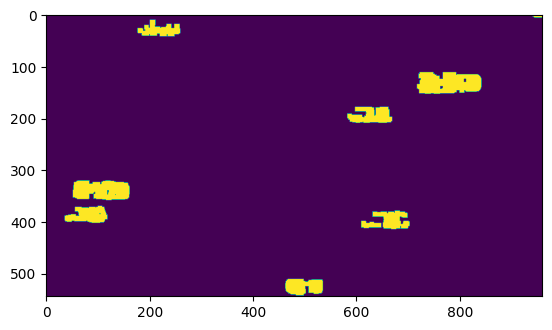

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scipy.ndimage import binary_dilation
c2 =0
f1 = 0
def convert_to_grayscale(frame):
    # Ensure the image is in RGB format (skimage expects this format)
    # if frame.shape[2] == 3:
    #     frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #     gray_frame = rgb2gray(frame_rgb)
    # else:
    gray_frame = rgb2gray(frame)
    return (gray_frame * 255).astype(np.uint8)  # Scale back to 0-255 and convert to uint8

def find_contours(binary_image):
    # Simple contour detection logic
    contours = []
    visited = np.zeros_like(binary_image, dtype=bool)

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 255 and not visited[i, j]:
                contour = []
                stack = [(i, j)]
                while stack:
                    ci, cj = stack.pop()
                    if not visited[ci, cj]:
                        visited[ci, cj] = True
                        contour.append((ci, cj))
                        for ni, nj in [(ci+1, cj), (ci-1, cj), (ci, cj+1), (ci, cj-1)]:
                            if 0 <= ni < binary_image.shape[0] and 0 <= nj < binary_image.shape[1]:
                                if binary_image[ni, nj] == 255:
                                    stack.append((ni, nj))
                if len(contour) > 5:  # Threshold to ignore small contours
                    contours.append(contour)
    return contours

def process_frame2(current_frame, previous_frame):
    gray_current = convert_to_grayscale(current_frame)
    gray_previous = convert_to_grayscale(previous_frame)

    # Absolute difference
    frame_diff = np.abs(np.subtract(gray_current, gray_previous, dtype=np.float32)).astype(np.uint8)
    # Thresholding
    thresh = np.where(frame_diff > 50, 255, 0).astype(np.uint8)
    
    # Dilation
    dilated = binary_dilation(thresh, structure=np.ones((5,5)))
    dilated = binary_dilation(dilated, structure=np.ones((5,5))).astype(np.uint8) * 255

    contours = find_contours(dilated)
    
    return contours,frame_diff,dilated
    
def compute_covariance_matrix(frame, x, y, w, h):
    """
    Compute the covariance matrix for the region specified by (x, y, w, h) in the frame.
    """
    region = frame[y:y+h, x:x+w]
    feature_set = np.float32(region.reshape(-1, 3))  # Reshape and convert to float
    mean, eigenvectors = cv2.PCACompute(feature_set, mean=None)
    covariance_matrix = np.cov(feature_set, rowvar=False)
    return covariance_matrix

def calculate_direction(prev_position, current_position):
    dx = current_position[0] - prev_position[0]
    dy = current_position[1] - prev_position[1]
    return np.arctan2(dy, dx)  # Returns angle in radians

def custom_bounding_rect(contour):
    if not contour:
        return 0, 0, 0, 0

    xs = [point[0] for point in contour]
    ys = [point[1] for point in contour]
    x_min, x_max = min(xs), max(xs)
    y_min, y_max = min(ys), max(ys)
    return x_min, y_min, x_max - x_min, y_max - y_min

def custom_contour_area(contour):
    n = len(contour)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        area += contour[i][0] * contour[j][1]
        area -= contour[j][0] * contour[i][1]
    return abs(area) / 2.0 
    
def detect_vehicles(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, previous_frame = cap.read()
    prev_cov_matrices = []
    prev_positions = []
    cnts = []
    while True:
        ret, current_frame = cap.read()
        if not ret:
            break
        
        contours = process_frame(current_frame, previous_frame)
        contours2 = process_frame2(current_frame, previous_frame)
        
        # Draw contours and display the vehicle count
        
        current_cov_matrices = []
        current_positions = []

        for cnt in contours:
            # x, y, w, h = custom_bounding_rect(cnt)
            # area = custom_contour_area(cnt)
            # aspect_ratio = w / float(h)
            cnt_np = np.array(cnt, dtype=np.int32)  # Convert cnt to a NumPy array
            x, y, w, h = cv2.boundingRect(cnt_np)
            aspect_ratio = w / float(h)
            area = cv2.contourArea(cnt_np)
            
            if area > 300 and aspect_ratio < 5:
                cov_matrix = compute_covariance_matrix(current_frame, x, y, w, h)
                centroid = (x + w//2, y + h//2)
                current_cov_matrices.append(cov_matrix)
                current_positions.append(centroid)
                cnts.append(cnt)

        
        current_frame2=current_frame.copy()
        for i, (cur_pos, cur_cov) in enumerate(zip(current_positions, current_cov_matrices)):
            min_dist = float('inf')
            matched_index = -1

            for j, (prev_pos, prev_cov) in enumerate(zip(prev_positions, prev_cov_matrices)):
                dist = np.linalg.norm(cur_cov - prev_cov)
                if dist < min_dist:
                    min_dist = dist
                    matched_index = j

            if matched_index != -1:
                direction = calculate_direction(prev_positions[matched_index], cur_pos)
                direction_degrees = np.degrees(direction)
                x, y, w, h = cv2.boundingRect(contours[i])
                cv2.rectangle(current_frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(current_frame2, f'Dir: {direction_degrees:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        prev_positions = current_positions.copy()
        prev_cov_matrices = current_cov_matrices.copy()
        previous_frame = current_frame.copy()
        frame_rgb = cv2.cvtColor(current_frame2, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.title(f'Vehicles Detected: {len(current_positions)}')
        plt.pause(0.1)
        plt.clf()

        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

detect_vehicles('cars4.mp4')